In [3]:
# Importing Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor,gradient_boosting
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.cluster import DBSCAN,k_means
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso,LassoCV,LinearRegression,Ridge,RidgeCV
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV,KFold,ParameterGrid,train_test_split
#from sklearn.neighbors import kd_tree,KDTree,KNeighborsClassifier
from sklearn.metrics import accuracy_score,auc,classification_report,confusion_matrix,euclidean_distances,euclidean_distances,f1_score
from sklearn.metrics import plot_roc_curve
from  sklearn.pipeline import Pipeline
from sklearn.svm import SVR,SVR
from sklearn.preprocessing import OneHotEncoder,power_transform,StandardScaler
from statsmodels.stats import anova,outliers_influence
import warnings
warnings.filterwarnings('ignore')

In [4]:
# loading the dataset
df=pd.read_csv(r'D:\Datatrained\Practice Project Data Trained\Power plant\database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [5]:
#Dropping this feature as single value is in rows
df['year_of_capacity_data'].value_counts()

2018.0    520
Name: year_of_capacity_data, dtype: int64

In [6]:
# checking dimentionality 
df.shape

(908, 25)

In [7]:
#Continueous Feature
#capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,
#generation_gwh_2017



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [9]:
#RangeIndex: 908 entries, 0 to 907
#dtypes: float64(13), object(12)
#Data columns (total 25 columns)


In [10]:
#Cheking null value

df.apply(lambda x: sum(x.isnull()))

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [11]:
# features who are having null values gretaer thean 80%

#other_fuel1,other_fuel2,other_fuel3,wepp_id,estimated_generation_gwh

In [12]:
# Lets look on number of unique value for each of categorical variable
df.apply(lambda x: len(x.unique()))

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    838
longitude                   829
primary_fuel                  8
other_fuel1                   4
other_fuel2                   2
other_fuel3                   1
commissioning_year           74
owner                       281
source                      191
url                         304
geolocation_source            4
wepp_id                       1
year_of_capacity_data         2
generation_gwh_2013         365
generation_gwh_2014         375
generation_gwh_2015         399
generation_gwh_2016         406
generation_gwh_2017         411
generation_data_source        2
estimated_generation_gwh      1
dtype: int64

In [13]:
# Few variable is having only one unique feature's value

#country,wepp_id,country_long,wepp_id,estimated_generation_gwh,generation_data_source


In [14]:
df['generation_data_source'].value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

In [15]:
df['year_of_capacity_data'].value_counts()

2018.0    520
Name: year_of_capacity_data, dtype: int64

In [16]:
df['geolocation_source'].value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [17]:
df['generation_data_source'].value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

In [18]:
df['estimated_generation_gwh'].value_counts()

Series([], Name: estimated_generation_gwh, dtype: int64)

In [19]:
# Three type of fuel types,combinimg for output variable

In [20]:
df['other_fuel2'].value_counts()

Oil    1
Name: other_fuel2, dtype: int64

In [21]:
df['other_fuel1'].value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [22]:
df['other_fuel3'].value_counts()

Series([], Name: other_fuel3, dtype: int64)

In [23]:
df['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [24]:
# df['generation_data_source'].value_counts()

In [25]:
# dropping the varibale which have only one uqique value

In [26]:
df=df.drop(columns=['country','country_long','other_fuel2','other_fuel3','wepp_id','name','gppd_idnr',
                 'estimated_generation_gwh','url','generation_data_source','source','owner','commissioning_year','year_of_capacity_data'],axis=1)

In [27]:
# Continueous and Categorigal features
df.head()


,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,NaN,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,WRI,631.777928,617.789264,843.747,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,Oil,WRI,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


In [28]:
#Stastics Analysis

In [29]:
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,862.000000,862.000000,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.447848,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.248627,4.907260,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.778300,76.719250,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.516375,79.441475,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


In [30]:
# Missing Value
#latitude,longitude,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,
#generation_gwh_2017
# High Standard deviation,huge gap between Min and Max,0 min value,huge gap between Min and Median of capacity_mw
# min value of year_of_capacity_data is zero
#High Standard Deviation observed for generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,
#generation_gwh_2017
# Zero min value for generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,
#generation_gwh_2017
#Huge gap between min and max of generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,
#generation_gwh_2017


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             862 non-null    float64
 2   longitude            862 non-null    float64
 3   primary_fuel         908 non-null    object 
 4   other_fuel1          199 non-null    object 
 5   geolocation_source   889 non-null    object 
 6   generation_gwh_2013  384 non-null    float64
 7   generation_gwh_2014  401 non-null    float64
 8   generation_gwh_2015  425 non-null    float64
 9   generation_gwh_2016  437 non-null    float64
 10  generation_gwh_2017  443 non-null    float64
dtypes: float64(8), object(3)
memory usage: 78.2+ KB


In [32]:
#Cheking null value

df.apply(lambda x: sum(x.isnull()))

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
geolocation_source      19
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

In [33]:
# Replacing null values with mode as geolocation_source and year_of_capacity_data are categorical variable

df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])


In [34]:
# Iterative Imputer

from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer


In [35]:
#Predictin null values 

Iter_impute=IterativeImputer()
df['generation_gwh_2013']=Iter_impute.fit_transform(df[['capacity_mw','generation_gwh_2013']])
df['generation_gwh_2014']=Iter_impute.fit_transform(df[['capacity_mw','generation_gwh_2014']])
df['generation_gwh_2015']=Iter_impute.fit_transform(df[['capacity_mw','generation_gwh_2015']])
df['generation_gwh_2016']=Iter_impute.fit_transform(df[['capacity_mw','generation_gwh_2016']])
df['generation_gwh_2017']=Iter_impute.fit_transform(df[['capacity_mw','generation_gwh_2017']])
df['latitude']=Iter_impute.fit_transform(df[['capacity_mw','latitude']])
df['longitude']=Iter_impute.fit_transform(df[['capacity_mw','longitude']])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    object 
 4   other_fuel1          199 non-null    object 
 5   geolocation_source   908 non-null    object 
 6   generation_gwh_2013  908 non-null    float64
 7   generation_gwh_2014  908 non-null    float64
 8   generation_gwh_2015  908 non-null    float64
 9   generation_gwh_2016  908 non-null    float64
 10  generation_gwh_2017  908 non-null    float64
dtypes: float64(8), object(3)
memory usage: 78.2+ KB


In [37]:
df.apply(lambda x: sum(x.isnull()))

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1            709
geolocation_source       0
generation_gwh_2013      0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
dtype: int64

In [38]:
df['other_fuel1'].value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [39]:

df['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [40]:
# nonrenewable resources: Oil, Gas, Coal, and Nuclear
# Renewal resource: Hydro,Solar,Wind,Biomass

In [41]:


df['primary_fuel']=df['primary_fuel'].replace({'Coal':1,'Hydro':0,'Solar':0,'Wind':1,'Gas':1,'Biomass':0,'Oil':1,'Nuclear':1})

In [42]:
df['primary_fuel'].value_counts()

1    481
0    427
Name: primary_fuel, dtype: int64

In [43]:
df['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     21
15.0      20
1200.0    19
          ..
645.0      1
41.4       1
17.5       1
445.0      1
106.6      1
Name: capacity_mw, Length: 365, dtype: int64

In [44]:
# capacity_mw is Continueous variable

In [45]:
#Dropping other_fuel1 as more than 80%v of rows are having Null value
#other_fuel1  has 709 null value

In [46]:
df=df.drop(columns=['other_fuel1'],axis=1)

In [47]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'geolocation_source', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

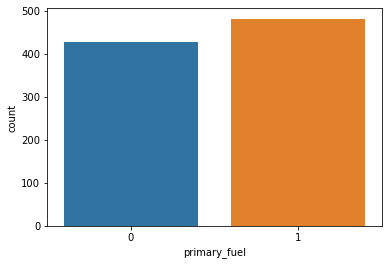

In [48]:
sns.countplot(x='primary_fuel',data=df)

In [49]:
# Balance output ,no balancing required

In [50]:
#Statistical Analysis
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,321.046378,321.046378,0.529736,321.046378,321.046378,321.046378,321.046378,321.046378
std,580.221767,580.221767,580.221767,0.499390,580.221767,580.221767,580.221767,580.221767,580.221767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.837500,16.837500,0.000000,16.837500,16.837500,16.837500,16.837500,16.837500
50%,60.000000,60.000000,60.000000,1.000000,60.000000,60.000000,60.000000,60.000000,60.000000
75%,388.125000,388.125000,388.125000,1.000000,388.125000,388.125000,388.125000,388.125000,388.125000
max,4760.000000,4760.000000,4760.000000,1.000000,4760.000000,4760.000000,4760.000000,4760.000000,4760.000000


In [51]:
# No Nul values
# Outlier treatment required 

In [52]:
# Multivariate Analysis
# checking correlation

corr_mat=df.corr() 
corr_mat

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
capacity_mw,1.000000,1.000000,1.000000,0.331017,1.000000,1.000000,1.000000,1.000000,1.000000
latitude,1.000000,1.000000,1.000000,0.331017,1.000000,1.000000,1.000000,1.000000,1.000000
longitude,1.000000,1.000000,1.000000,0.331017,1.000000,1.000000,1.000000,1.000000,1.000000
primary_fuel,0.331017,0.331017,0.331017,1.000000,0.331017,0.331017,0.331017,0.331017,0.331017
generation_gwh_2013,1.000000,1.000000,1.000000,0.331017,1.000000,1.000000,1.000000,1.000000,1.000000
generation_gwh_2014,1.000000,1.000000,1.000000,0.331017,1.000000,1.000000,1.000000,1.000000,1.000000
generation_gwh_2015,1.000000,1.000000,1.000000,0.331017,1.000000,1.000000,1.000000,1.000000,1.000000
generation_gwh_2016,1.000000,1.000000,1.000000,0.331017,1.000000,1.000000,1.000000,1.000000,1.000000
generation_gwh_2017,1.000000,1.000000,1.000000,0.331017,1.000000,1.000000,1.000000,1.000000,1.000000


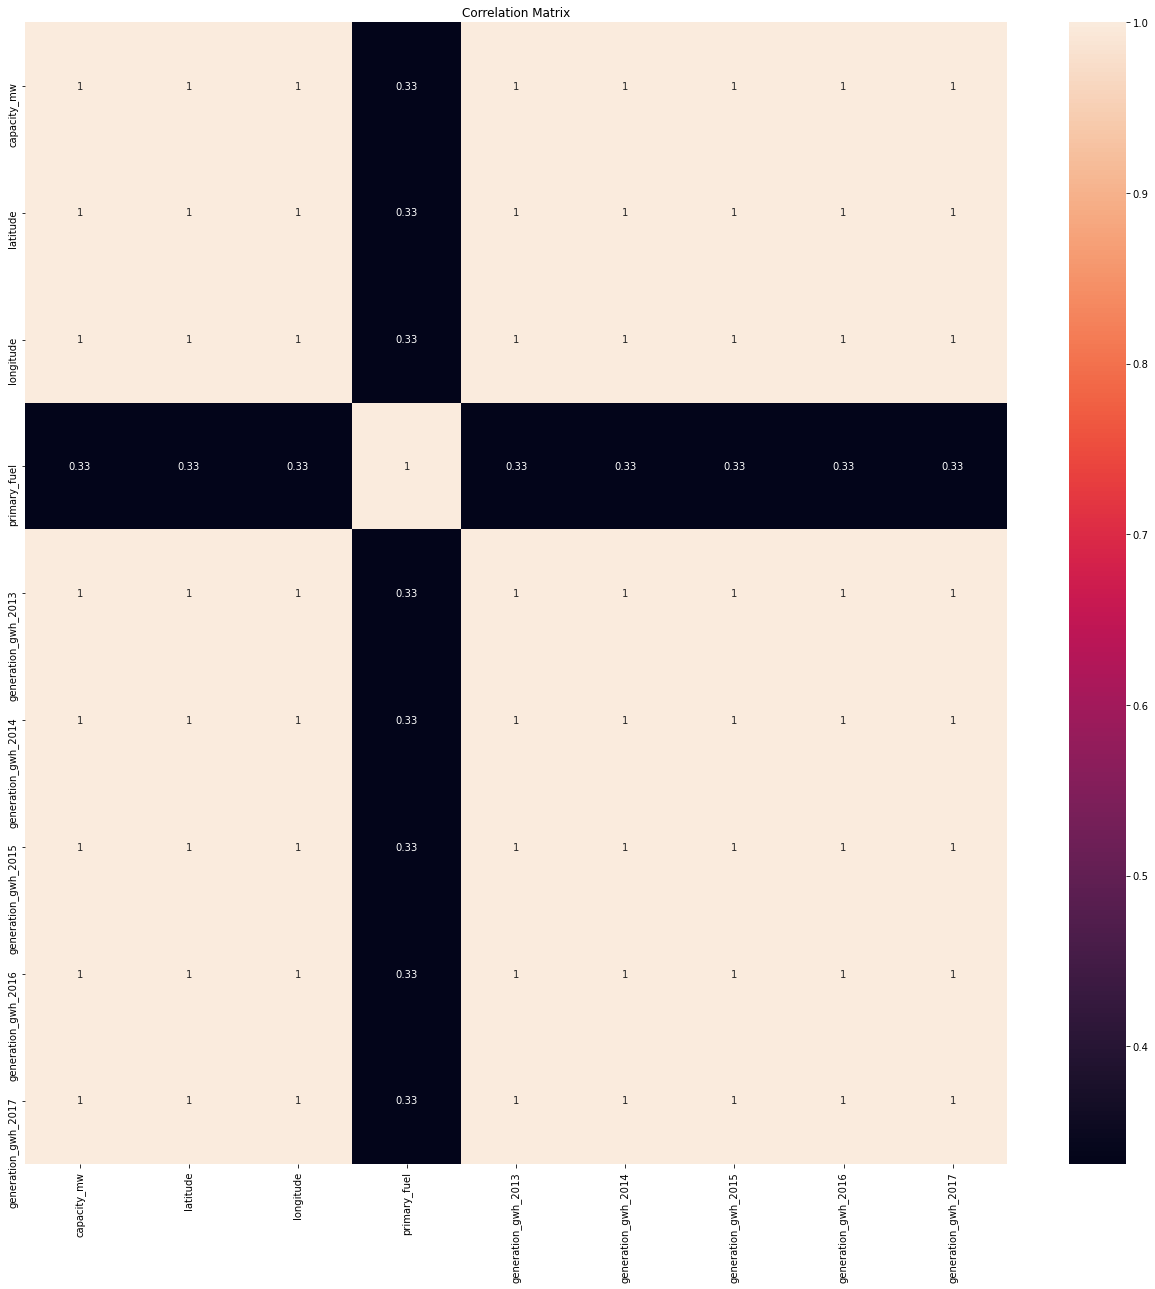

In [53]:
# It is difficut to analyse each feature co-relation in tabular form,lets convert into heat map plot
plt.figure(figsize= [22,21])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [54]:
#Each feature is strongly corelated with eachother but not drpping any variabe based on corelation  as of now 

In [55]:
cnt_f=df[['capacity_mw', 'latitude', 'longitude','generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']]

In [56]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'geolocation_source', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

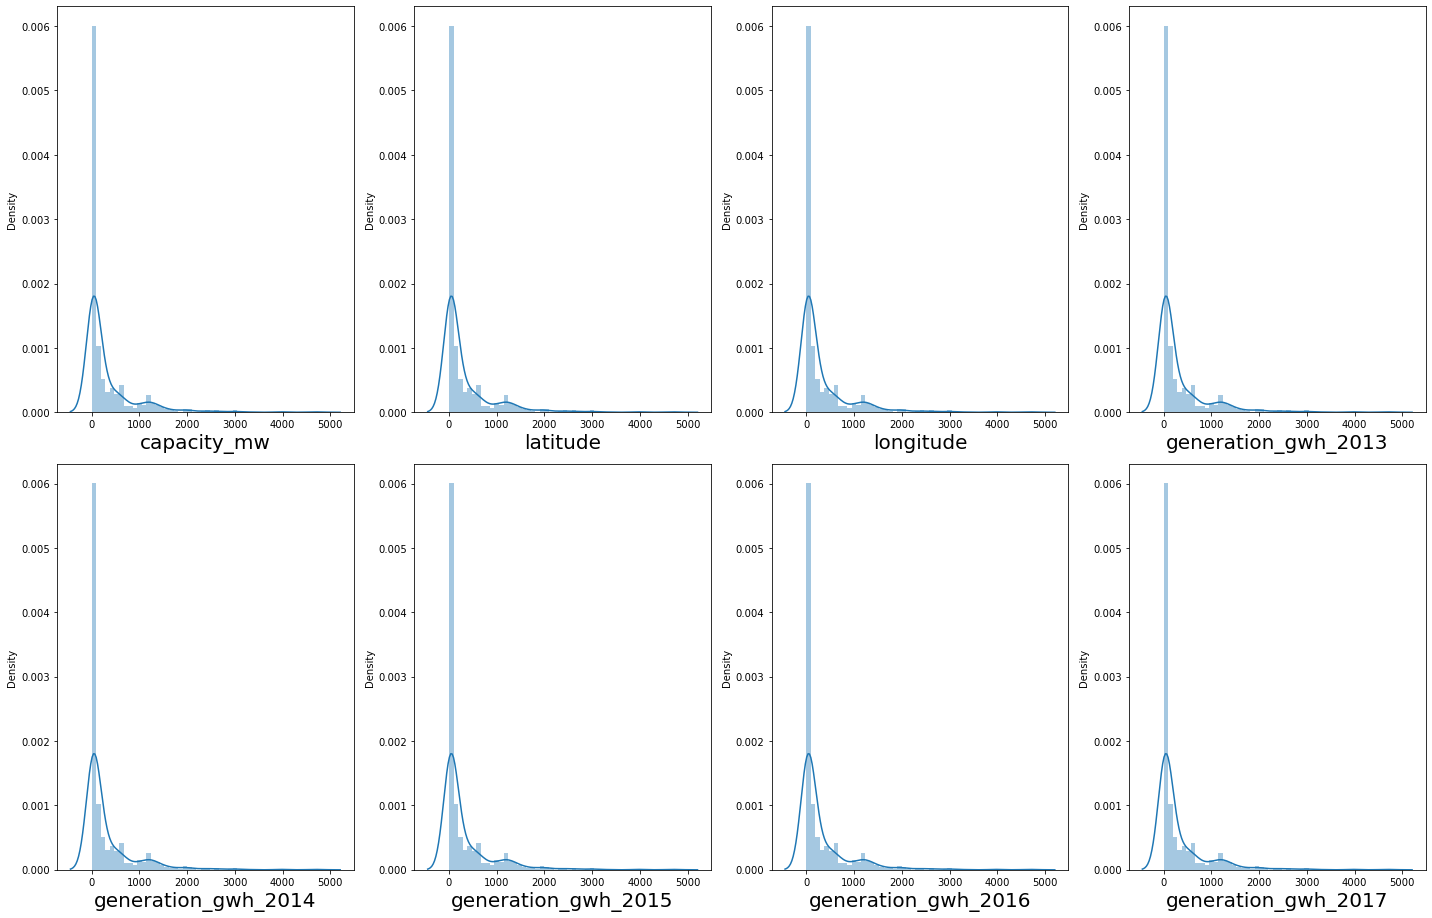

In [57]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in cnt_f:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(cnt_f[column])
        plt.xlabel(column,fontsize=20)
       
    
    plotnumber+=1
plt.tight_layout() 

In [58]:
# based on distribution plot,
#Right skewed
'capacity_mw', 'latitude', 'longitude', 'geolocation_source', 'generation_gwh_2013', 'generation_gwh_2014'
'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'

# Left Skewed

'capacity_mw', 'latitude', 'longitude', 'geolocation_source', 'generation_gwh_2013', 'generation_gwh_2014'
'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'



('generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017')

In [59]:
# Using 'yeo-jonshon transformation for skewed data

cnt_f=[ 'latitude', 'longitude','generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']

In [60]:
#https://stackoverflow.com/questions/65836268/valueerror-boolean-array-expected-for-the-condition-not-object

In [61]:
from sklearn.preprocessing import PowerTransformer
scalar= PowerTransformer(method='yeo-johnson')

In [62]:
df[cnt_f]=scalar.fit_transform(df[cnt_f].values)

In [63]:
df[cnt_f]

,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,-1.695723,-1.695723,-1.695723,-1.695723,-1.695723,-1.695723,-1.695723
1,0.192511,0.192511,0.192511,0.192511,0.192511,0.192511,0.192511
2,-0.294920,-0.294920,-0.294920,-0.294920,-0.294920,-0.294920,-0.294920
3,0.360587,0.360587,0.360587,0.360587,0.360587,0.360587,0.360587
4,1.660257,1.660257,1.660257,1.660257,1.660257,1.660257,1.660257
...,...,...,...,...,...,...,...
903,1.603578,1.603578,1.603578,1.603578,1.603578,1.603578,1.603578
904,-1.615938,-1.615938,-1.615938,-1.615938,-1.615938,-1.615938,-1.615938
905,-0.525593,-0.525593,-0.525593,-0.525593,-0.525593,-0.525593,-0.525593
906,0.085318,0.085318,0.085318,0.085318,0.085318,0.085318,0.085318


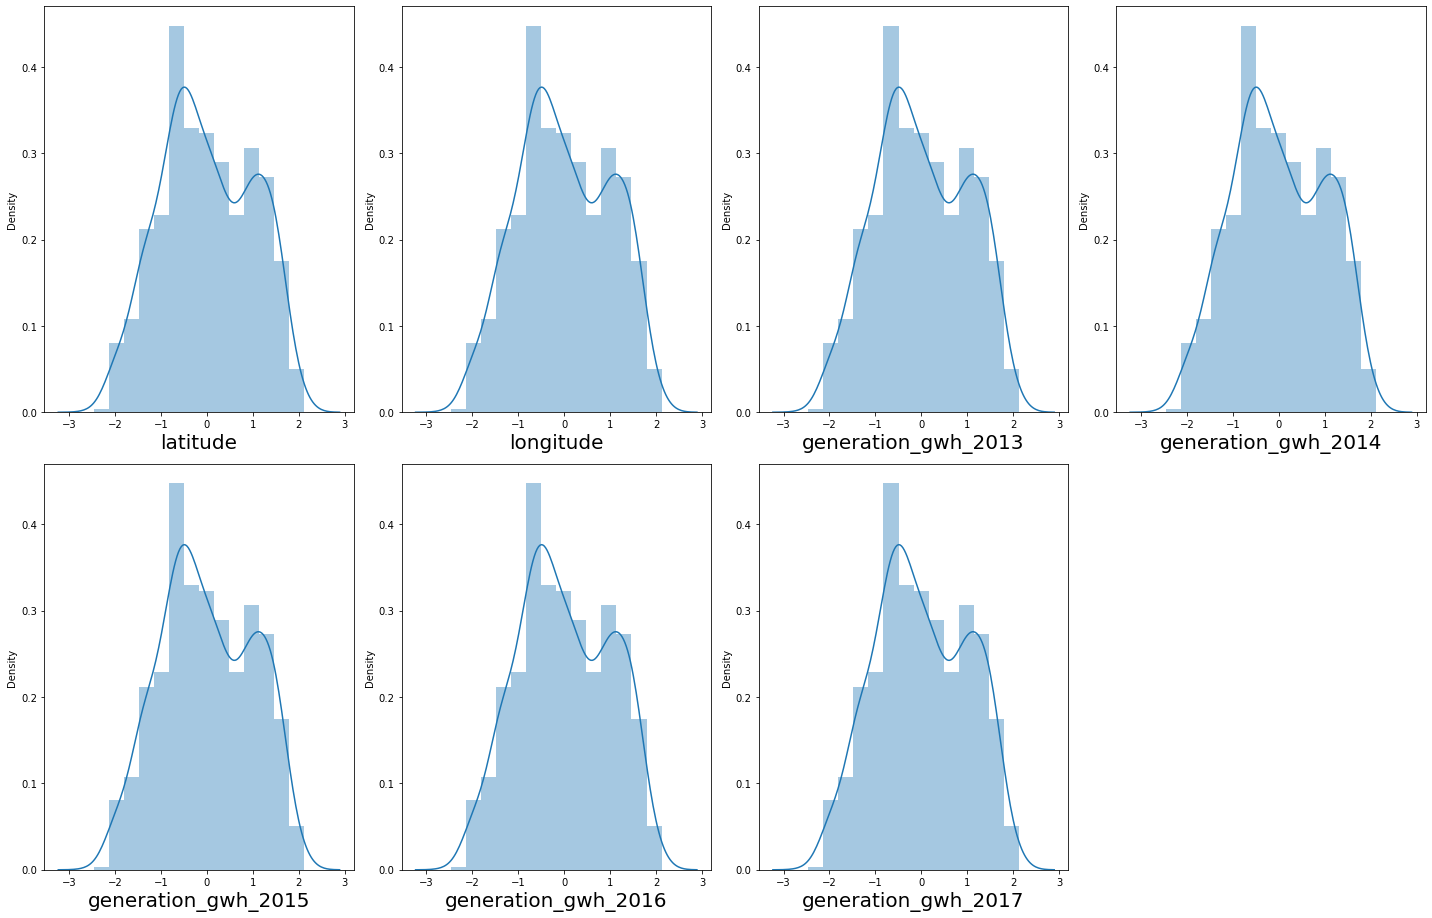

In [64]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df[cnt_f]:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[cnt_f][column])
        plt.xlabel(column,fontsize=20)
       
    
    plotnumber+=1
plt.tight_layout() 

In [65]:
# skewness of data is now better as compare to before transformation

In [66]:
df[cnt_f].columns

Index(['latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

In [67]:
# converting categorical feature into numrerical

In [68]:
df['geolocation_source'].value_counts()

WRI                                     785
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [69]:
#Encoder and Imputer
# we shoud put the column in order before applying OHE or Label Encoder

from sklearn.preprocessing import LabelEncoder

In [70]:
lab_enc=LabelEncoder()

In [71]:
df2=lab_enc.fit_transform(df['geolocation_source'])
pd.Series(df2)

0      1
1      2
2      2
3      2
4      2
      ..
903    2
904    0
905    2
906    2
907    2
Length: 908, dtype: int32

In [72]:
df['geolocation_source']=df2
df

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,-1.695723,-1.695723,0,1,-1.695723,-1.695723,-1.695723,-1.695723,-1.695723
1,98.0,0.192511,0.192511,1,2,0.192511,0.192511,0.192511,0.192511,0.192511
2,39.2,-0.294920,-0.294920,1,2,-0.294920,-0.294920,-0.294920,-0.294920,-0.294920
3,135.0,0.360587,0.360587,1,2,0.360587,0.360587,0.360587,0.360587,0.360587
4,1800.0,1.660257,1.660257,1,2,1.660257,1.660257,1.660257,1.660257,1.660257
...,...,...,...,...,...,...,...,...,...,...
903,1600.0,1.603578,1.603578,1,2,1.603578,1.603578,1.603578,1.603578,1.603578
904,3.0,-1.615938,-1.615938,0,0,-1.615938,-1.615938,-1.615938,-1.615938,-1.615938
905,25.5,-0.525593,-0.525593,1,2,-0.525593,-0.525593,-0.525593,-0.525593,-0.525593
906,80.0,0.085318,0.085318,1,2,0.085318,0.085318,0.085318,0.085318,0.085318


In [73]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'geolocation_source', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

In [74]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,-1.695723,-1.695723,0,1,-1.695723,-1.695723,-1.695723,-1.695723,-1.695723
1,98.0,0.192511,0.192511,1,2,0.192511,0.192511,0.192511,0.192511,0.192511
2,39.2,-0.294920,-0.294920,1,2,-0.294920,-0.294920,-0.294920,-0.294920,-0.294920
3,135.0,0.360587,0.360587,1,2,0.360587,0.360587,0.360587,0.360587,0.360587
4,1800.0,1.660257,1.660257,1,2,1.660257,1.660257,1.660257,1.660257,1.660257


In [75]:
x_over=df.drop(columns=['primary_fuel'])
y_over=df['primary_fuel'] 

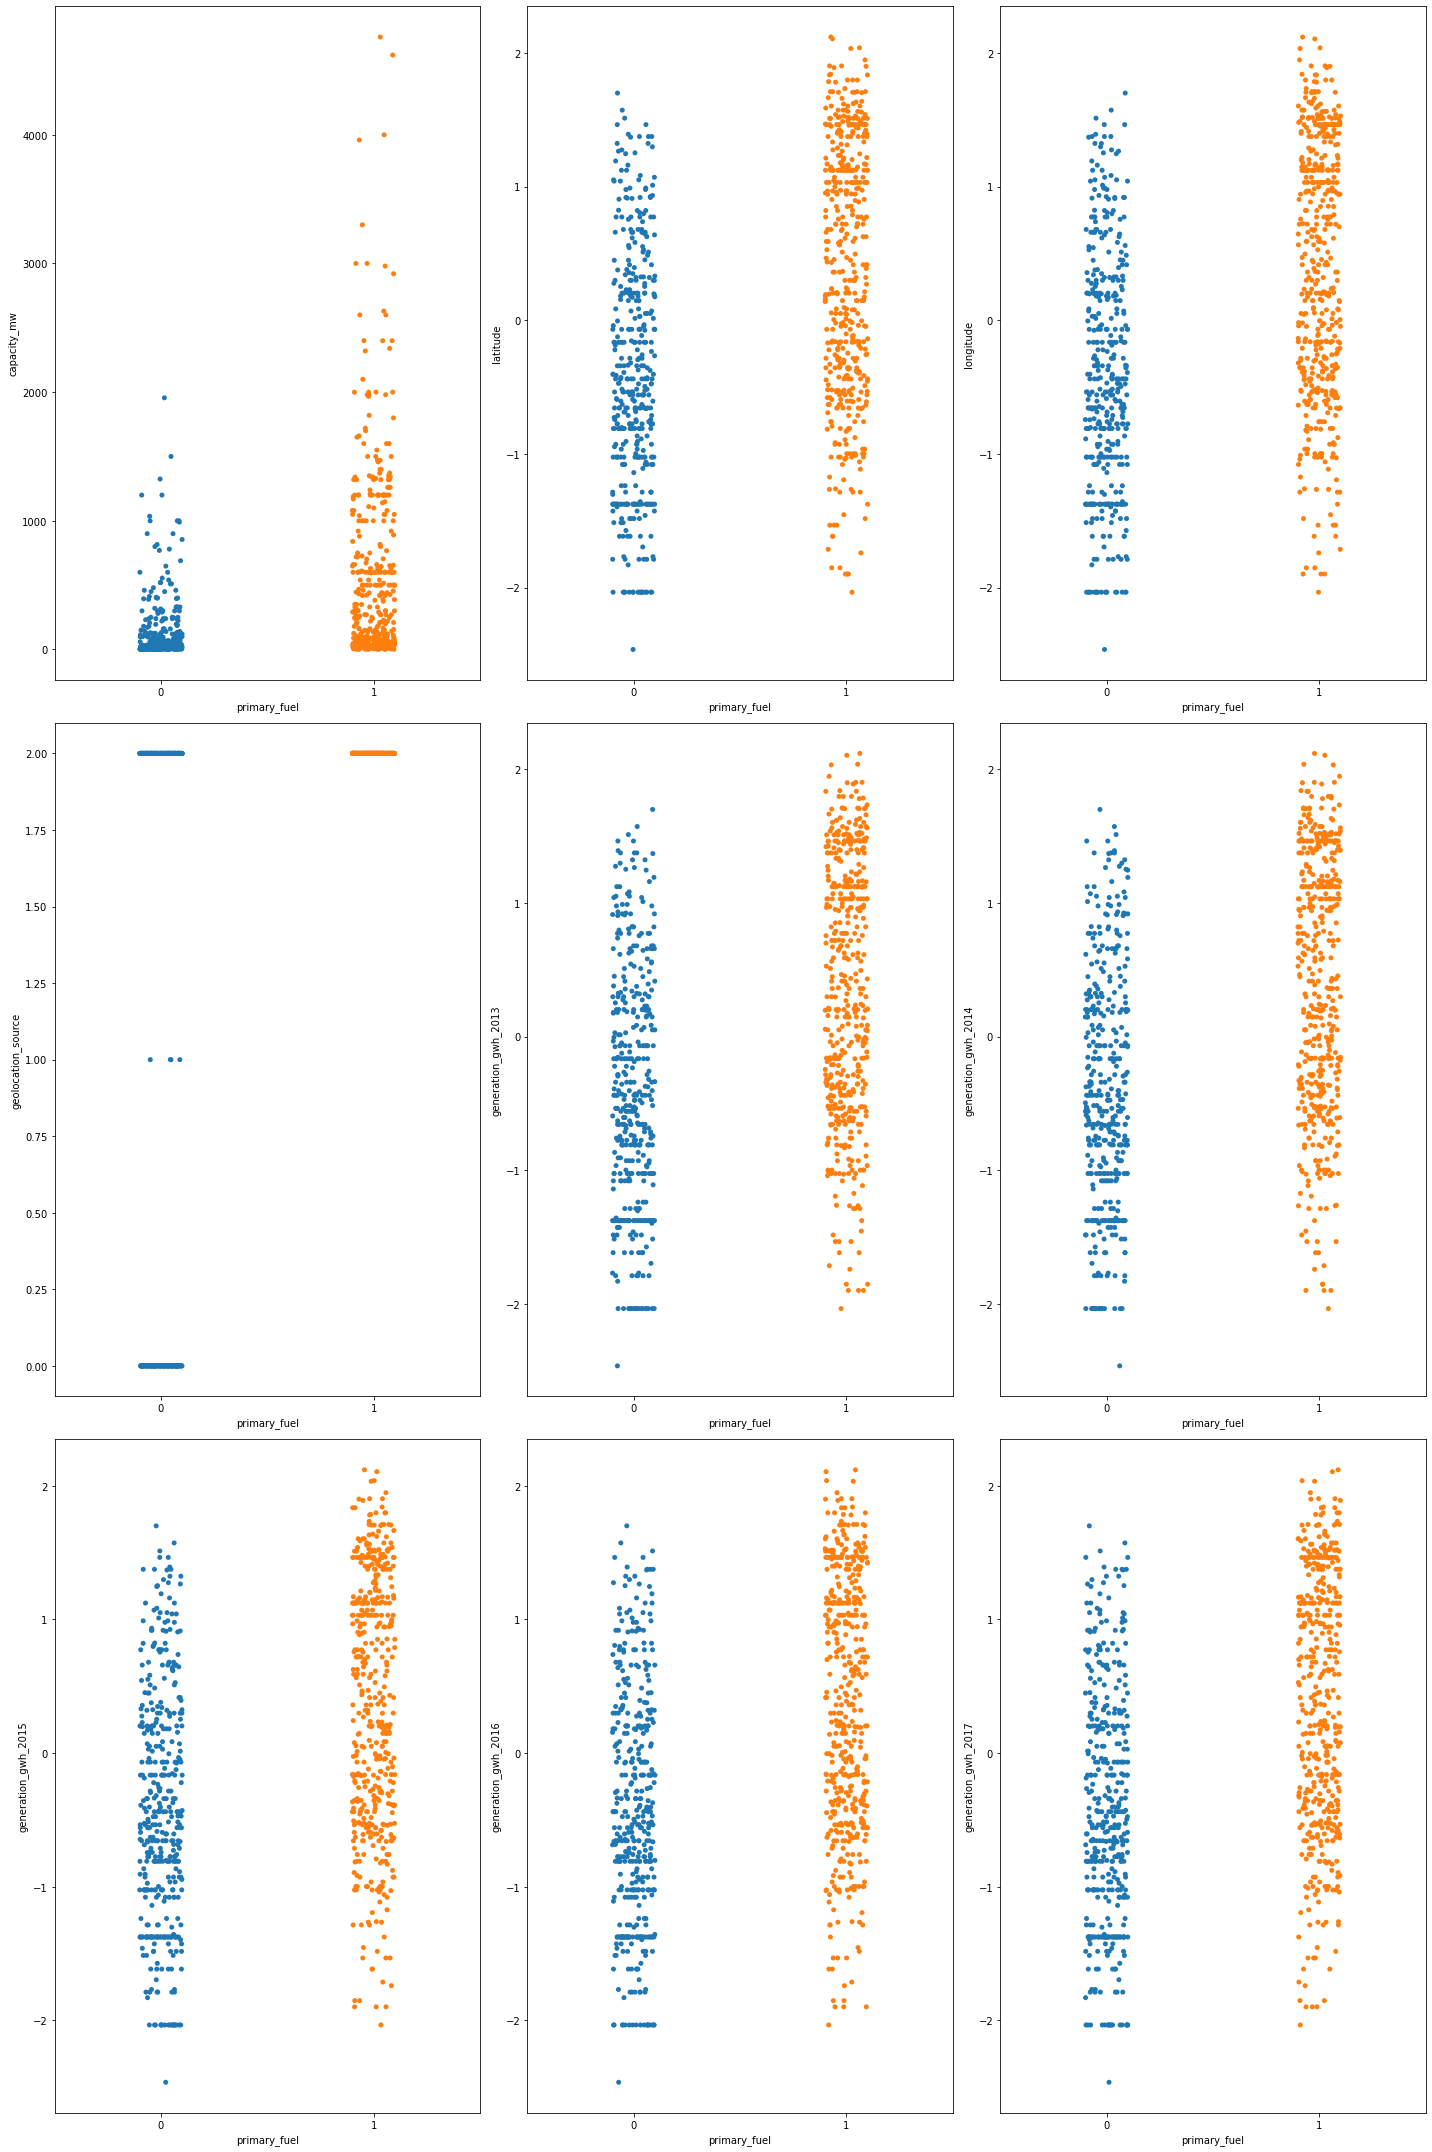

In [77]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in x_over:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(y_over,x_over[column])
    plotnumber+=1
plt.tight_layout()

In [78]:
# based on graph, we can see that each feature is havig strong co relation with the output

In [79]:
# Model Development

In [80]:
# Finding best random state

In [81]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,10000):
    x_train,x_test,y_train,y_test =train_test_split(x_over,y_over,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

Best accuracy is 0.73992673992674 on Random_state 7252


In [82]:
#Best accuracy is 0.706959706959707 on Random_state 14

In [83]:
#Creating Train test split

In [84]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.673992673992674
[[ 71  61]
 [ 28 113]]
              precision    recall  f1-score   support

           0       0.72      0.54      0.61       132
           1       0.65      0.80      0.72       141

    accuracy                           0.67       273
   macro avg       0.68      0.67      0.67       273
weighted avg       0.68      0.67      0.67       273



In [85]:
import xgboost as xgb
xgb=xgb.XGBClassifier()
xgb.fit(x_train,y_train)
predxgb=xgb.predict(x_test)
print(accuracy_score(y_test,predxgb))
print(confusion_matrix(y_test,predxgb))
print(classification_report(y_test,predxgb))

[11:30:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7216117216117216
[[100  32]
 [ 44  97]]
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       132
           1       0.75      0.69      0.72       141

    accuracy                           0.72       273
   macro avg       0.72      0.72      0.72       273
weighted avg       0.72      0.72      0.72       273



In [86]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.6886446886446886
[[96 36]
 [49 92]]
              precision    recall  f1-score   support

           0       0.66      0.73      0.69       132
           1       0.72      0.65      0.68       141

    accuracy                           0.69       273
   macro avg       0.69      0.69      0.69       273
weighted avg       0.69      0.69      0.69       273



In [87]:
from sklearn.ensemble import AdaBoostClassifier
Ada=AdaBoostClassifier()
Ada.fit(x_train,y_train)
predAda=Ada.predict(x_test)
print(accuracy_score(y_test,predAda))
print(confusion_matrix(y_test,predAda))
print(classification_report(y_test,predAda))

0.6776556776556777
[[ 66  66]
 [ 22 119]]
              precision    recall  f1-score   support

           0       0.75      0.50      0.60       132
           1       0.64      0.84      0.73       141

    accuracy                           0.68       273
   macro avg       0.70      0.67      0.67       273
weighted avg       0.69      0.68      0.67       273



In [88]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
predRF=RF.predict(x_test)
print(accuracy_score(y_test,predRF))
print(confusion_matrix(y_test,predRF))
print(classification_report(y_test,predRF))

0.6996336996336996
[[94 38]
 [44 97]]
              precision    recall  f1-score   support

           0       0.68      0.71      0.70       132
           1       0.72      0.69      0.70       141

    accuracy                           0.70       273
   macro avg       0.70      0.70      0.70       273
weighted avg       0.70      0.70      0.70       273



In [89]:
from sklearn.neighbors import KNeighborsClassifier  
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKN=dt.predict(x_test)
print(accuracy_score(y_test,predKN))
print(confusion_matrix(y_test,predKN))
print(classification_report(y_test,predKN))

0.6886446886446886
[[96 36]
 [49 92]]
              precision    recall  f1-score   support

           0       0.66      0.73      0.69       132
           1       0.72      0.65      0.68       141

    accuracy                           0.69       273
   macro avg       0.69      0.69      0.69       273
weighted avg       0.69      0.69      0.69       273



In [90]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.6923076923076923
[[94 38]
 [46 95]]
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       132
           1       0.71      0.67      0.69       141

    accuracy                           0.69       273
   macro avg       0.69      0.69      0.69       273
weighted avg       0.69      0.69      0.69       273



In [ ]:
# cheking overfitting problem

In [91]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR,x_over,y_over,cv=5)
print("Cross Validation Score fo Logistic Regression :",scr.mean())

Cross Validation Score fo Logistic Regression : 0.6596685082872928


In [92]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(xgb,x_over,y_over,cv=5)
print("Cross Validation Score fo XGB :",scr.mean())

[11:35:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:35:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:35:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:35:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [93]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf,x_over,y_over,cv=5)
print("Cross Validation Score fo RandomForest :",scr.mean())

Cross Validation Score fo RandomForest : 0.6817861696314735


In [94]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt,x_over,y_over,cv=5)
print("Cross Validation Score fo Decesion Tree :",scr.mean())

Cross Validation Score fo Decesion Tree : 0.6894966911541498


In [95]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(Ada,x_over,y_over,cv=5)
print("Cross Validation Score fo Adaboost :",scr.mean())

Cross Validation Score fo Adaboost : 0.6651872988889563


In [ ]:
      Model Accuracy      Cross Validation Score      Diff
LR     67                         65                  2
DT     76                         68                  12
RF     70                         68                  2
Ada    68                         66                  2
Xgb    72                         67                  5

Since diff is 2 with high model accuracy for RF,It is the best model 

In [96]:
# Hyper parameter tuning

In [102]:
# Need to give range for max_depth,min_samples_split,min_samples_leaf and more criterion.No fixed param,params should go for variours 
#combination to get higher acccuracy.

#Base estimatotors for Random forest is decesion tree

params ={'n_estimators':range(3,15,2),
       'criterion':['entropy','Ginni'],
       'max_depth':range(1,20,2),
       'min_samples_split':range(1,20,2),
       'min_samples_leaf':range(1,15,2)}

grd = GridSearchCV(rf,param_grid=params)
grd.fit(x_train,y_train)
print('best_params =>', grd.best_params_)

rf=grd.best_estimator_ # reinstantiating with best params
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

fr_conf_mat= confusion_matrix(y_test,y_pred)
print('conf_mat =>','\n',fr_conf_mat)

print('Accuracy rf Normal =====>',accuracy_score(y_test,y_pred))

best_params => {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 7}
conf_mat => 
 [[96 36]
 [51 90]]
Accuracy rf Normal =====> 0.6813186813186813


In [ ]:
import pickle

# writing diffrent model files to file

with open('modelForPrediction.sav','LR') as f:
    pickle.dump(rf,f)
    
with open ('SandardScalar.sav','LR') as f:
    pickle.dump(scalar,f)

In [ ]:
# Now considering capacity_mw as output variable or target variable

In [103]:
x_over_reg=df.drop(columns=['capacity_mw','primary_fuel'])
y_over_reg=df['capacity_mw'] 

In [104]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [105]:
import warnings
warnings.filterwarnings('ignore')

In [106]:
for i in range(0,1000):
    features_train,features_test,target_train,target_test=train_test_split(x_over_reg,y_over_reg,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)

    print(f"At random state {i},the training accuracy is:-{r2_score(target_train,pred_train)}")
    print(f"At random state {i},the training accuracy is:-{r2_score(target_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:-0.5716200028086258
At random state 0,the training accuracy is:-0.5148912902975016


At random state 1,the training accuracy is:-0.5714935505645069
At random state 1,the training accuracy is:-0.49970285821861693


At random state 2,the training accuracy is:-0.5503241331493978
At random state 2,the training accuracy is:-0.5898142360494321


At random state 3,the training accuracy is:-0.5535913267076862
At random state 3,the training accuracy is:-0.5766497652527864


At random state 4,the training accuracy is:-0.5574498626179036
At random state 4,the training accuracy is:-0.5543116756981139


At random state 5,the training accuracy is:-0.5674791509825015
At random state 5,the training accuracy is:-0.5276731531482066


At random state 6,the training accuracy is:-0.5541118053674636
At random state 6,the training accuracy is:-0.5732574209025012


At random state 7,the training accuracy is:-0.5384391366811287
At random state 7,the training accuracy 

In [108]:
features_train,features_test,target_train,target_test=train_test_split(x_over_reg,y_over_reg,test_size=0.2,random_state=999)

In [109]:
lr.fit(features_train,target_train)

LinearRegression()

In [110]:
pred_test=lr.predict(features_test)

In [111]:
print(r2_score(target_test,pred_test))

0.6409345695891058


In [ ]:
Cross-validation of the model:

In [113]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x_over_reg,y_over_reg,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for the tarining is {Train_accuracy}and accuracy for the testing is {Test_accuracy}")
    print("/n")

At cross fold 2 the cv score is 0.5396107524900371 and accuracy score for the tarining is 0.5414597274446631and accuracy for the testing is 0.6409345695891058
/n
At cross fold 3 the cv score is 0.5362979059027339 and accuracy score for the tarining is 0.5414597274446631and accuracy for the testing is 0.6409345695891058
/n
At cross fold 4 the cv score is 0.5540176340282446 and accuracy score for the tarining is 0.5414597274446631and accuracy for the testing is 0.6409345695891058
/n
At cross fold 5 the cv score is 0.5495423810236131 and accuracy score for the tarining is 0.5414597274446631and accuracy for the testing is 0.6409345695891058
/n
At cross fold 6 the cv score is 0.5488873401149313 and accuracy score for the tarining is 0.5414597274446631and accuracy for the testing is 0.6409345695891058
/n
At cross fold 7 the cv score is 0.5566910629691099 and accuracy score for the tarining is 0.5414597274446631and accuracy for the testing is 0.6409345695891058
/n
At cross fold 8 the cv score

In [ ]:
Here we have handled the problem of the overfitting and underfitting by checking the training and testing score

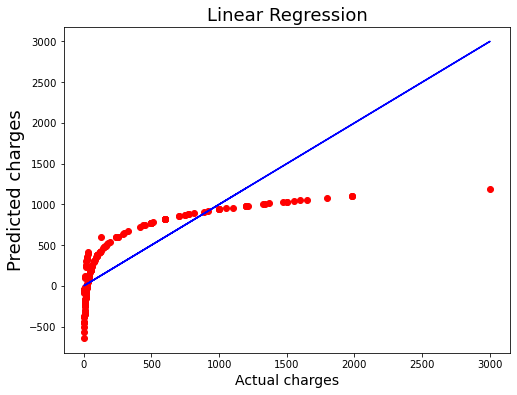

In [114]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=18)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [ ]:
Best fit line covering most of the datapoints which shows good fit of our model

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [116]:
from sklearn.linear_model import Lasso

Parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,Parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [117]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)

lss=r2_score(target_test,pred_ls)
lss

0.6420578294593808

In [119]:
cv_score=cross_val_score(ls,x_over_reg,y_over_reg,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5488694647263173

In [ ]:
Ensemble technique:

In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters ={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [122]:
rf=RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decesion=rf.predict(features_test)

rfs=r2_score(target_test,pred_decesion)
print("R2 Score",rfs*100)

rfscore=cross_val_score(rf,x_over_reg,y_over_reg,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score 99.99431768045173
Cross Val Score: 99.89032305321783


In [ ]:
we are getting model accuracy and cross validation both as 99.8% which shows our model is performing extremely well

In [125]:
import pickle
filename='churn.pkl'
pickle.dump(rf,open(filename,'wb'))

In [127]:
loaded_model =pickle.load(open('churn.pkl','rb'))
result=loaded_model.score(features_test,target_test)
print(result)

0.9999431768045173


In [128]:
conlusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_decesion[:]],index=["Predicted","Original"])
conlusion

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,180,181
Predicted,10.0,100.0,75.0,20.0,50.0,500.0,812.758,21.9968,96.02,5.0,...,25.516,62.606,9.001,12.4186,500.0,21.0,912.65,239.91,5.0,1200.0
Original,10.0,100.0,75.0,20.0,50.0,500.0,812.758,21.9968,96.02,5.0,...,25.516,62.606,9.001,12.4186,500.0,21.0,912.65,239.91,5.0,1200.0
